# Examining the difference in spike counts between drifting and static gratings

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

c:\Users\georg\anaconda3\Anaconda1\envs\neuroscience_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_dir = "./allendata"

manifest_path = os.path.join(data_dir, "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)
sessions = cache.get_session_table()

In [3]:
id = 750332458
session = cache.get_session_data(id)

c:\Users\georg\anaconda3\Anaconda1\envs\neuroscience_project\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
c:\Users\georg\anaconda3\Anaconda1\envs\neuroscience_project\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### Getting the table for static and drifting

In [4]:
table_static = session.get_stimulus_table("static_gratings")

table_static.head()

,stimulus_block,start_time,stop_time,contrast,orientation,size,spatial_frequency,phase,stimulus_name,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,
49434,8.0,5398.833208,5399.083416,0.8,0.0,"[250.0, 250.0]",0.04,0.25,static_gratings,0.250209,4787
49435,8.0,5399.083416,5399.333625,0.8,0.0,"[250.0, 250.0]",0.32,0.0,static_gratings,0.250209,4788
49436,8.0,5399.333625,5399.583834,0.8,30.0,"[250.0, 250.0]",0.04,0.0,static_gratings,0.250209,4789
49437,8.0,5399.583834,5399.834042,0.8,90.0,"[250.0, 250.0]",0.08,0.75,static_gratings,0.250209,4790
49438,8.0,5399.834042,5400.084249,0.8,60.0,"[250.0, 250.0]",0.08,0.25,static_gratings,0.250206,4791


In [5]:
table_drifting = session.get_stimulus_table("drifting_gratings")

table_drifting.head()

,stimulus_block,start_time,stop_time,contrast,orientation,size,spatial_frequency,phase,stimulus_name,temporal_frequency,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,
3798,2.0,1585.647748,1587.649398,0.8,180.0,"[250.0, 250.0]",0.04,"[21235.93333333, 21235.93333333]",drifting_gratings,4.0,2.00165,246
3799,2.0,1588.650242,1590.651902,0.8,225.0,"[250.0, 250.0]",0.04,"[21235.93333333, 21235.93333333]",drifting_gratings,4.0,2.00166,247
3800,2.0,1591.652728,1593.654418,0.8,135.0,"[250.0, 250.0]",0.04,"[21235.93333333, 21235.93333333]",drifting_gratings,2.0,2.00169,248
3801,2.0,1594.655252,1596.656912,0.8,0.0,"[250.0, 250.0]",0.04,"[21235.93333333, 21235.93333333]",drifting_gratings,2.0,2.00166,249
3802,2.0,1597.657758,1599.659418,0.8,315.0,"[250.0, 250.0]",0.04,"[21235.93333333, 21235.93333333]",drifting_gratings,15.0,2.00166,250


### Desigining a spike count function

the function

In [6]:
def get_spike(session, stimuli, ecephys_structure_acronym):

    table = session.get_stimulus_table(stimuli)


    stimulus_presentation_ids = table.index.values
    unit_ids = session.units[session.units["ecephys_structure_acronym"] == ecephys_structure_acronym].index.values

    spike_counts = session.conditionwise_spike_statistics(
        stimulus_presentation_ids=stimulus_presentation_ids,
        unit_ids =unit_ids,
    )
 
    return spike_counts

In [7]:
static_spike_counts = get_spike(session, stimuli = "static_gratings", ecephys_structure_acronym="VISam")

static_spike_counts



,,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem
unit_id,stimulus_condition_id,,,,,
951819523,4787,21,49,0.428571,1.040833,0.148690
951819532,4787,35,49,0.714286,0.707107,0.101015
951819541,4787,86,49,1.755102,1.774009,0.253430
951819550,4787,41,49,0.836735,1.650088,0.235727
951819732,4787,233,49,4.755102,2.250283,0.321469
...,...,...,...,...,...,...
951820825,4907,4,48,0.083333,0.347228,0.050118
951820832,4907,2,48,0.041667,0.201941,0.029148
951820847,4907,11,48,0.229167,0.592132,0.085467


In [8]:
drifting_spike_counts = get_spike(session, stimuli = "drifting_gratings", ecephys_structure_acronym="VISam")

drifting_spike_counts

,,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem
unit_id,stimulus_condition_id,,,,,
951819523,246,147,15,9.800000,9.412757,2.430363
951819532,246,202,15,13.466667,18.212502,4.702448
951819541,246,129,15,8.600000,5.315745,1.372519
951819550,246,50,15,3.333333,5.246314,1.354592
951819732,246,793,15,52.866667,30.258096,7.812607
...,...,...,...,...,...,...
951820825,286,44,15,2.933333,6.485882,1.674648
951820832,286,3,15,0.200000,0.414039,0.106904
951820847,286,16,15,1.066667,1.334523,0.344572


Immediately we notice that there are approx. 3x as many units identified for static gratings than drifting gratings. 

(??? How is it that for a session we only have around 60 units in VISam but then there are )

### Analyzing the spike means to see how much units get activated when encountering single stimulus

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [10]:
drifting_spike_counts_unind = drifting_spike_counts.reset_index(level='stimulus_condition_id', drop=True)
static_spike_counts_unind= static_spike_counts.reset_index(level='stimulus_condition_id', drop=True)

static_spike_counts_unind

,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem
unit_id,,,,,
951819523,21,49,0.428571,1.040833,0.148690
951819532,35,49,0.714286,0.707107,0.101015
951819541,86,49,1.755102,1.774009,0.253430
951819550,41,49,0.836735,1.650088,0.235727
951819732,233,49,4.755102,2.250283,0.321469
...,...,...,...,...,...
951820825,4,48,0.083333,0.347228,0.050118
951820832,2,48,0.041667,0.201941,0.029148
951820847,11,48,0.229167,0.592132,0.085467


Begin by looking at overlapping units activated by both static and drifting gratings stimuli.

In [11]:
n_overlap = len(set(drifting_spike_counts_unind.index) & set(static_spike_counts_unind.index))
print("Overlapping unit_ids:", n_overlap)

drifting_spike_counts_mean = drifting_spike_counts_unind.groupby("unit_id").mean()
static_spike_counts_mean = static_spike_counts_unind.groupby("unit_id").mean()

print(drifting_spike_counts_mean.shape)

drifting_spike_counts_mean.head()



Overlapping unit_ids: 60
(60, 5)


,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem
unit_id,,,,,
951819523,160.365854,15.365854,10.681301,8.534982,2.200874
951819532,382.902439,15.365854,25.269919,14.390455,3.699846
951819541,218.365854,15.365854,14.479675,11.890855,3.062789
951819550,125.682927,15.365854,8.238211,7.069394,1.814801
951819732,400.682927,15.365854,26.700813,15.716924,4.056505


In [12]:
merged_spikes = static_spike_counts_mean.merge(drifting_spike_counts_mean, left_index=True, right_index=True, how="inner", suffixes=('_static', '_drifting'))

merged_spikes.head()

,spike_count_static,stimulus_presentation_count_static,spike_mean_static,spike_std_static,spike_sem_static,spike_count_drifting,stimulus_presentation_count_drifting,spike_mean_drifting,spike_std_drifting,spike_sem_drifting
unit_id,,,,,,,,,,
951819523,22.793388,49.586777,0.464778,0.845017,0.121123,160.365854,15.365854,10.681301,8.534982,2.200874
951819532,100.553719,49.586777,2.053190,1.687109,0.241707,382.902439,15.365854,25.269919,14.390455,3.699846
951819541,97.338843,49.586777,1.979897,1.782085,0.255407,218.365854,15.365854,14.479675,11.890855,3.062789
951819550,62.041322,49.586777,1.243782,1.685748,0.241079,125.682927,15.365854,8.238211,7.069394,1.814801
951819732,123.008264,49.586777,2.520199,1.733729,0.248376,400.682927,15.365854,26.700813,15.716924,4.056505


We check if there is a difference in the mean number of spikes per presentation for these overlapping units.

       spike_mean_static  spike_mean_drifting
count          60.000000            60.000000
mean            1.844668            15.917358
std             1.876499            16.709206
min             0.045735             0.521138
25%             0.363631             4.534553
50%             1.163493             8.932927
75%             2.654046            25.019309
max             7.676357            89.430081


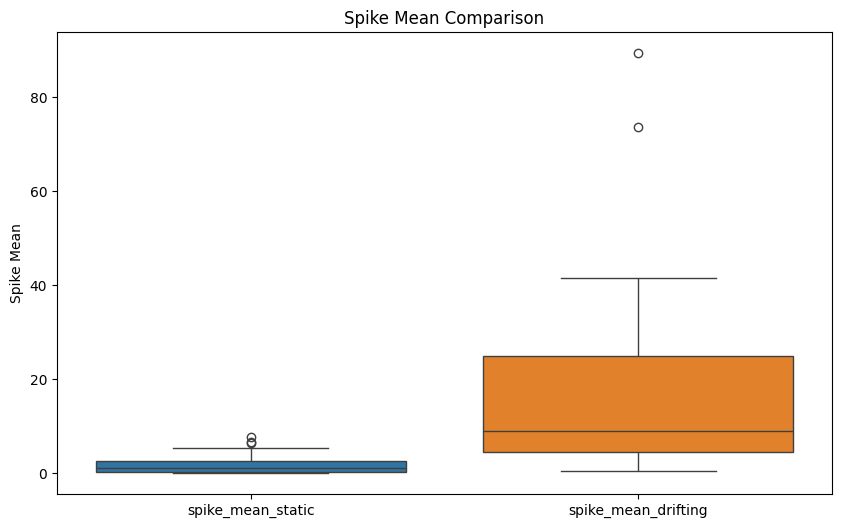

In [13]:
# Summary statistics
print(merged_spikes[['spike_mean_static', 'spike_mean_drifting']].describe())

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_spikes[['spike_mean_static', 'spike_mean_drifting']])
plt.title('Spike Mean Comparison')
plt.ylabel('Spike Mean')
plt.show()



### Hypothesis testing 

H0: there is no difference in mean number of spikes between drifting and static gratings

In [14]:
# Shapiro-Wilk test for normality

merged_spikes['diff'] = merged_spikes['spike_mean_drifting'] - merged_spikes['spike_mean_static']

shapiro_stat, shapiro_p = stats.shapiro(merged_spikes['diff'])
print(f"Shapiro-Wilk p-value: {shapiro_p:.4f}")

# we select alpha as 0.05
alpha = 0.05
if shapiro_p > alpha:
    print("Differences are normally distributed (fail to reject H0)")
else:
    print("Differences are NOT normally distributed (reject H0)")

Shapiro-Wilk p-value: 0.0000
Differences are NOT normally distributed (reject H0)


In [15]:
# Paired t-test (parametric)
t_stat, t_p = stats.ttest_rel(merged_spikes['spike_mean_static'], merged_spikes['spike_mean_drifting'])
print(f"Paired t-test p-value: {t_p:.4f}")

# Wilcoxon signed-rank test (non-parametric)
wilcoxon_stat, wilcoxon_p = stats.wilcoxon(merged_spikes['spike_mean_static'], merged_spikes['spike_mean_drifting'])
print(f"Wilcoxon p-value: {wilcoxon_p:.4f}")

Paired t-test p-value: 0.0000
Wilcoxon p-value: 0.0000


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X = merged_spikes[['spike_mean_drifting', 'spike_mean_static']]
y = np.where(merged_spikes['spike_mean_drifting'] > merged_spikes['spike_mean_static'], 1, 0)  # Binary label

clf = RandomForestClassifier()
scores = cross_val_score(clf, X, y, cv=5)
print(f"Classification Accuracy: {np.mean(scores):.3f} ± {np.std(scores):.3f}")

Classification Accuracy: 1.000 ± 0.000


No we do the same investigation with the spike coefficient of variation (CV=std/mean) to see if the variability is also greater for drifting gratings.

       spike_CV_static  spike_CV_drifting
count        60.000000          60.000000
mean          1.505387           0.840494
std           1.087011           0.421895
min           0.333912           0.306192
25%           0.686148           0.499605
50%           1.066187           0.748730
75%           1.934422           1.031799
max           4.917109           2.025295


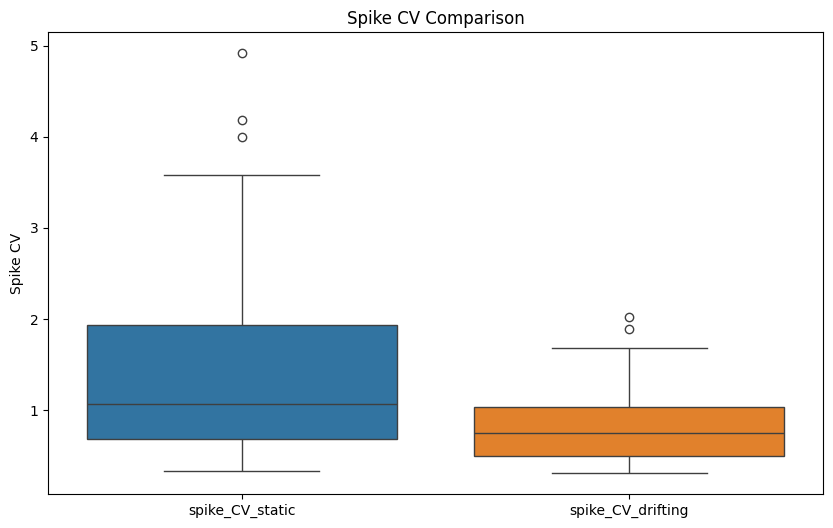

In [21]:
merged_spikes_var = merged_spikes.copy()

# Calculate the coefficient of variation (CV) for static and drifting conditions
merged_spikes_var['spike_CV_static'] = merged_spikes_var['spike_std_static'] / merged_spikes_var['spike_mean_static']
merged_spikes_var['spike_CV_drifting'] = merged_spikes_var['spike_std_drifting'] / merged_spikes_var['spike_mean_drifting']

# Summary statistics
print(merged_spikes_var[['spike_CV_static', 'spike_CV_drifting']].describe())

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_spikes_var[['spike_CV_static', 'spike_CV_drifting']])
plt.title('Spike CV Comparison')
plt.ylabel('Spike CV')
plt.show()


We see that CV is if anything higher for static gratings suggesting a higher variability in static gratings. We again verify if the pairwise differences are normally distributed.

H0: There is no difference between the CV of static and drifting spikes for overlapping units

In [22]:
# Shapiro-Wilk test for normality

merged_spikes_var['diff_CV'] = merged_spikes_var['spike_CV_static'] - merged_spikes_var['spike_CV_drifting']

shapiro_stat, shapiro_p = stats.shapiro(merged_spikes_var['diff_CV'])
print(f"Shapiro-Wilk p-value: {shapiro_p:.4f}")

# we select alpha as 0.05
alpha = 0.05
if shapiro_p > alpha:
    print("Differences in CV are normally distributed (fail to reject H0)")
else:
    print("Differences in CV are NOT normally distributed (reject H0)")

Shapiro-Wilk p-value: 0.0000
Differences in CV are NOT normally distributed (reject H0)


In [23]:
# Paired t-test (parametric)
t_stat, t_p = stats.ttest_rel(merged_spikes_var['spike_CV_static'], merged_spikes_var['spike_CV_drifting'])
print(f"Paired t-test p-value: {t_p:.4f}")

# Wilcoxon signed-rank test (non-parametric)
wilcoxon_stat, wilcoxon_p = stats.wilcoxon(merged_spikes_var['spike_CV_static'], merged_spikes_var['spike_CV_drifting'])
print(f"Wilcoxon p-value: {wilcoxon_p:.4f}")

Paired t-test p-value: 0.0000
Wilcoxon p-value: 0.0000


In [26]:
X = merged_spikes_var[['spike_CV_static', 'spike_CV_drifting']]
y = np.where(merged_spikes_var['spike_CV_static'] > merged_spikes_var['spike_CV_drifting'], 1, 0)  # Binary label

clf = RandomForestClassifier()
scores = cross_val_score(clf, X, y, cv=5)
print(f"Classification Accuracy: {np.mean(scores):.3f} ± {np.std(scores):.3f}")

del merged_spikes_var #Delete this to free up space

Classification Accuracy: 0.967 ± 0.041


We conclude that in fact the Coefficient of Variation (CV) is in fact higher for static gratings than drifting gratings. This difference is also statistically significant and can be used to classify the two effectively.

So far we have investigated differences in overlapping units, which are only 60 (a huge minority) so we look at all for the sake of completeness.

            count       mean        std  min       25%       50%        75%  \
condition                                                                     
drifting   2460.0  15.917358  18.519560  0.0  3.533333  8.866667  22.333333   
static     7260.0   1.844668   2.113908  0.0  0.285714  1.020621   2.660000   

                  max  
condition              
drifting   136.533333  
static      14.877551  


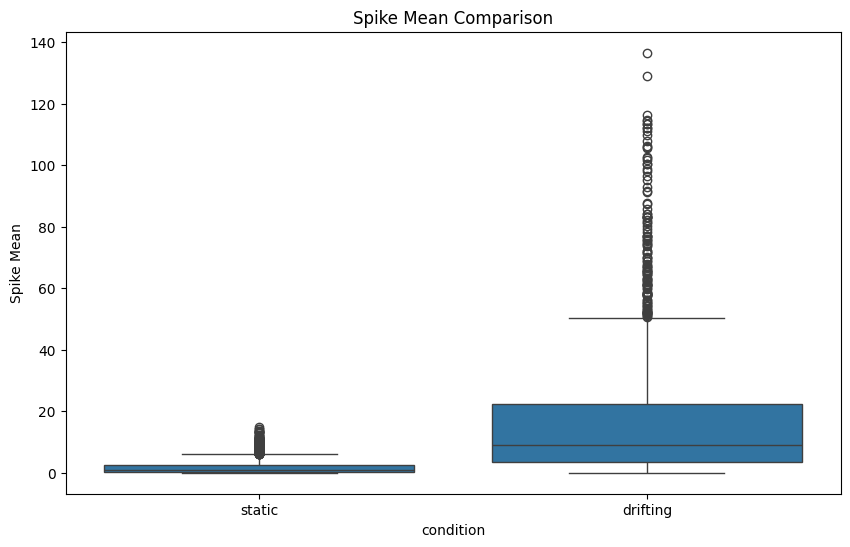

In [ ]:
# Directly extract spike_mean values from each dataframe
static_means = static_spike_counts['spike_mean']
drifting_means = drifting_spike_counts['spike_mean']

data = pd.concat([
    pd.DataFrame({'spike_mean': static_means, 'condition': 'static'}),
    pd.DataFrame({'spike_mean': drifting_means, 'condition': 'drifting'})
], ignore_index=True)

# Display summary statistics if desired
print(data.groupby('condition')['spike_mean'].describe())

# Boxplot comparing spike_mean for static vs drifting
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='spike_mean', data=data)
plt.title('Spike Mean Comparison')
plt.ylabel('Spike Mean')
plt.show()

In [40]:
# Perform a two-sided Mann-Whitney U test
u_stat, p_val = stats.mannwhitneyu(static_means, drifting_means, alternative="two-sided")
print(f"Mann-Whitney U test statistic: {u_stat}")
print(f"Mann-Whitney U test p-value: {p_val:.4f}")

Mann-Whitney U test statistic: 2337507.0
Mann-Whitney U test p-value: 0.0000


The Mann-Whitney U test (a non-parametric test) reveals that the spike_mean is higher for drifting gratings than static gratings for all stimuli.